In [2]:
import pandas as pd
import json
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl

import os

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:88% !important; }</style>"))
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
os.chdir(r'C:\Users\steve\GitHub\rp-covid-migration')

In [4]:
df_nta = pd.read_csv(r'data/nycnta/archive/time_away_ntas_2020.csv')
# read in ACS estimates
# acs_nta = pd.read_csv(r'data/acs_nta.csv')
# df = pd.merge(df_nta, acs_nta, left_on="NTA", right_on="orig_nta", how="inner")
df_nta.head(5)

,NTA,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,1/10/20,1/11/20,1/12/20,1/13/20,1/14/20,1/15/20,1/16/20,1/17/20,1/18/20,1/19/20,1/20/20,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20
0,BK09,0.046617,0.054817,0.026034,0.021002,0.029457,0.021341,0.020344,0.029508,0.025848,0.020867,0.032626,0.020344,0.030249,0.016484,0.021526,0.023483,0.025501,0.040146,0.029144,0.036298,0.022514,0.022569,0.019784,0.017375,0.027972,0.007092,0.012613,0.011719,0.007968,0.011742,0.016162,0.014134,0.015789,0.016000,0.025890,0.023411,0.018998,0.010135,0.026667,0.019835,0.009524,0.025641,0.014634,0.011945,0.023850,0.035842,0.061111,0.038391,0.030651,0.022430,0.029825,0.033989,0.030195,0.014134,0.008621,0.008052,0.010417,0.008696,0.018692,0.037523,0.007788,0.011220,0.007194,0.008557,0.007979,0.007205,0.024502,0.004484,0.007003,0.010169,0.012048,0.042589,0.031097,0.075838,0.076789,0.089317,0.126838,0.106195,0.101045,0.068441,0.050740,0.112474,0.184524,0.172147,0.179817,0.195446,0.190476,0.251546,0.205323,0.194495,0.208015,0.160714,0.137931,0.150826,0.144444,0.157895,0.180000,0.177730,0.207265,0.157549,0.176329,0.174208,0.181395,0.176887,0.169197,0.136038,0.152505,0.165865,0.172566,0.116438,0.169856,0.191964,0.159737,0.158257,0.178404,0.129630,0.167431,0.151316,0.131799,0.133803,0.157277,0.018692,0.023952,0.007220,0.021472,0.036810,0.031250,0.030488,0.053156,0.045455,0.016287,0.032895,0.031546,0.023569,0.011730,0.022857,0.026059,0.027108,0.030120,0.049180,0.060060,0.047022,0.040462,0.056962,0.055866,0.048571,0.048930,0.055901,0.050794,0.026786,0.034375,0.018018,0.040230,0.045872,0.054313,0.033639,0.022082,0.041139,0.026667,0.027950,0.026946,0.042169,0.041139,0.044444,0.055215,0.021053,0.047022,0.056426,0.038462,0.061224,0.037543,0.036789,0.049123,0.079882,0.023333,0.032895,0.047619,0.010909,0.055351,0.044280,0.046053,0.051661,0.037931,0.058394,0.057047,0.073427,0.031034,0.047138,0.045732,0.048077,0.047945,0.059561,0.039007,0.038314,0.038062,0.057047,0.044872,0.036789,0.054839,0.027344,0.030075,0.083333,0.080000,0.036913,0.054745,0.054348,0.035714,0.026578,0.046

In [5]:
list_date = df_nta.columns.tolist()
list_date = list_date[33:153] # march 1st to may 31st
#list_date = list_date[61:63] # march 1st to march 2nd
df = pd.melt(df_nta, id_vars=['NTA'],value_vars = list_date)
df = df.rename(columns={'NTA':'id'}) #rename so the join ids are the same
df['variable'] = df.variable.str.replace('-','/')
df['val_pct'] = df['value']*100 # convert it into percentage

# # read in ACS estimates
acs_nta = pd.read_csv(r'data/nycnta/archive/acs_nta.csv')
df = pd.merge(df, acs_nta, left_on="id", right_on="orig_nta", how="inner")
df['Date'] = pd.to_datetime(df['variable'])
df = df.drop(columns = 'orig_nta', axis =1)

# nbhood = gpd.read_file(r'data\shapefiles\nynta.shp')
# nbhood.drop(columns = ['BoroCode','CountyFIPS','Shape_Leng','Shape_Area','geometry'])
# df = pd.merge(df, nbhood, left_on = 'id', right_on = 'NTACode', how = 'inner')
# #df = df.drop(columns = ['NTACode'])
# df = df.rename({'NTAName':'neighborhood'}, axis = 1)
# df['neighborhood'] = df['neighborhood'].str.replace('-',' ') # replace - value with space
# df.head()
# # df.to_csv(r'data\pct_time_away.csv')

In [6]:
df.head()

,id,variable,value,val_pct,Asian_C,Asian_E,Asian_M,Black_C,Black_E,Black_M,Hispanic_C,Hispanic_E,Hispanic_M,Other_C,Other_E,Other_M,Pop_C,Pop_E,Pop_M,White_C,White_E,White_M,Date
0,BK09,2/2/20,0.015789,1.578947,9.329878,2236.0,343.173426,16.302782,1400.0,375.45306,12.35668,1770.0,359.783268,15.51473,1224.0,312.385979,2.900848,24168.0,1153.271434,3.474016,17538.0,1002.25396,2020-02-02
1,BK09,2/3/20,0.016000,1.600000,9.329878,2236.0,343.173426,16.302782,1400.0,375.45306,12.35668,1770.0,359.783268,15.51473,1224.0,312.385979,2.900848,24168.0,1153.271434,3.474016,17538.0,1002.25396,2020-02-03
2,BK09,2/4/20,0.025890,2.588997,9.329878,2236.0,343.173426,16.302782,1400.0,375.45306,12.35668,1770.0,359.783268,15.51473,1224.0,312.385979,2.900848,24168.0,1153.271434,3.474016,17538.0,1002.25396,2020-02-04
3,BK09,2/5/20,0.023411,2.341137,9.329878,2236.0,343.173426,16.302782,1400.0,375.45306,12.35668,1770.0,359.783268,15.51473,1224.0,312.385979,2.900848,24168.0,1153.271434,3.474016,17538.0,1002.25396,2020-02-05
4,BK09,2/6/20,0.018998,1.899827,9.329878,2236.0,343.173426,16.302782,1400.0,375.45306,12.35668,1770.0,359.783268,15.51473,1224.0,312.385979,2.900848,24168.0,1153.271434,3.474016,17538.0,1002.25396,2020-02-06


In [8]:
df['week'] = df['Date'].dt.strftime('%U')
df.head()


,id,variable,value,val_pct,Asian_C,Asian_E,Asian_M,Black_C,Black_E,Black_M,Hispanic_C,Hispanic_E,Hispanic_M,Other_C,Other_E,Other_M,Pop_C,Pop_E,Pop_M,White_C,White_E,White_M,Date,week
0,BK09,2/2/20,0.015789,1.578947,9.329878,2236.0,343.173426,16.302782,1400.0,375.45306,12.35668,1770.0,359.783268,15.51473,1224.0,312.385979,2.900848,24168.0,1153.271434,3.474016,17538.0,1002.25396,2020-02-02,05
1,BK09,2/3/20,0.016000,1.600000,9.329878,2236.0,343.173426,16.302782,1400.0,375.45306,12.35668,1770.0,359.783268,15.51473,1224.0,312.385979,2.900848,24168.0,1153.271434,3.474016,17538.0,1002.25396,2020-02-03,05
2,BK09,2/4/20,0.025890,2.588997,9.329878,2236.0,343.173426,16.302782,1400.0,375.45306,12.35668,1770.0,359.783268,15.51473,1224.0,312.385979,2.900848,24168.0,1153.271434,3.474016,17538.0,1002.25396,2020-02-04,05
3,BK09,2/5/20,0.023411,2.341137,9.329878,2236.0,343.173426,16.302782,1400.0,375.45306,12.35668,1770.0,359.783268,15.51473,1224.0,312.385979,2.900848,24168.0,1153.271434,3.474016,17538.0,1002.25396,2020-02-05,05
4,BK09,2/6/20,0.018998,1.899827,9.329878,2236.0,343.173426,16.302782,1400.0,375.45306,12.35668,1770.0,359.783268,15.51473,1224.0,312.385979,2.900848,24168.0,1153.271434,3.474016,17538.0,1002.25396,2020-02-06,05


In [9]:
weekly = df.groupby(['id', 'week'], as_index = False
                   ).agg(
                        {'Pop_E':'sum',
                         'value':'mean',
                        })
weekly['Pop_E'] = weekly['Pop_E']/7
weekly['pop_away'] = (weekly['value']*weekly['Pop_E'])
weekly = weekly.drop(columns = 'Pop_E')
# weekly = weekly.pivot(index = 'id', columns = 'week')
weekly.head(13)

,id,week,value,pop_away
0,BK09,05,0.019556,472.625569
1,BK09,06,0.020182,487.749820
2,BK09,07,0.035228,851.379235
3,BK09,08,0.015162,366.434719
4,BK09,09,0.010635,257.029066
5,BK09,10,0.026176,632.609605
6,BK09,11,0.088481,2138.402120
7,BK09,12,0.183776,4441.492381
8,BK09,13,0.171679,4149.128004
9,BK09,14,0.175854,4250.031766


In [10]:
nbhood = gpd.read_file(r'data\shapefiles\nynta.shp')
nbhood.drop(columns = ['BoroCode','CountyFIPS','Shape_Leng','Shape_Area','geometry'])
weekly = pd.merge(weekly, nbhood, left_on = 'id', right_on = 'NTACode', how = 'inner')
#df = df.drop(columns = ['NTACode'])
weekly = weekly.rename({'NTAName':'neighborhood'}, axis = 1)
# weekly['neighborhood'] = weekly['neighborhood'].str.replace('-',' ') # replace - value with space
weekly.head()

,id,week,value,pop_away,BoroCode,BoroName,CountyFIPS,NTACode,neighborhood,Shape_Leng,Shape_Area,geometry
0,BK09,05,0.019556,472.625569,3,Brooklyn,047,BK09,Brooklyn Heights-Cobble Hill,14264.786528,9.983620e+06,"POLYGON ((986367.735 190549.239, 985813.835 19..."
1,BK09,06,0.020182,487.749820,3,Brooklyn,047,BK09,Brooklyn Heights-Cobble Hill,14264.786528,9.983620e+06,"POLYGON ((986367.735 190549.239, 985813.835 19..."
2,BK09,07,0.035228,851.379235,3,Brooklyn,047,BK09,Brooklyn Heights-Cobble Hill,14264.786528,9.983620e+06,"POLYGON ((986367.735 190549.239, 985813.835 19..."
3,BK09,08,0.015162,366.434719,3,Brooklyn,047,BK09,Brooklyn Heights-Cobble Hill,14264.786528,9.983620e+06,"POLYGON ((986367.735 190549.239, 985813.835 19..."
4,BK09,09,0.010635,257.029066,3,Brooklyn,047,BK09,Brooklyn Heights-Cobble Hill,14264.786528,9.983620e+06,"POLYGON ((986367.735 190549.239, 985813.835 19..."


In [ ]:
# weekly.to_csv(r'data/weekly_counts.csv', index = False)
weekly.describe()

In [11]:
df = pd.merge(df, nbhood, left_on = 'id', right_on = 'NTACode', how = 'inner')
borough_ct = df.groupby(['BoroName', 'week'], as_index = False
                   ).agg(
                        {'Pop_E':'sum',
                         'value':'mean',
                        })
borough_ct['Pop_E'] = borough_ct['Pop_E']/7
borough_ct['pop_away'] = (borough_ct['value']*borough_ct['Pop_E'])
borough_ct = borough_ct.drop(columns = 'Pop_E')
borough_ct = borough_ct[borough_ct.week != '22']
# borough_ct.head(14)
# borough_ct.to_csv(r'data/wk_borough_cnts.csv', index = False)
b_count_pivot = borough_ct.pivot(index = 'BoroName', columns = 'week')
b_count_pivot.head()
b_count_pivot.to_csv(r'data/nycnta/archive/wk_borough_pivot.csv')

In [ ]:
fig = px.bar(borough_ct, x ='week',y='pop_away', color = 'BoroName',
            labels = {'BoroName':'Borough'})
fig.show()

### Mapping NTAs by week - plotly

In [ ]:
map_ntas = json.load(open(r'data\shapefiles\NTA map.geojson','r'))


In [ ]:
fig = px.choropleth_mapbox(weekly, geojson = map_ntas,
                   locations ='id',
                   color = 'pop_away',
                   hover_name = 'id',
                   animation_frame ='week',
                   color_continuous_scale = "Viridis",
                   opacity = 0.99,
                   labels={'pop_away':'Average Number of Residents away/week', 'id':'NTA Code'},
                   range_color = [0,20000])
fig.update_layout(mapbox_zoom = 9.45,
                 mapbox_center = {'lat':40.7, 'lon':-73.95},
                 mapbox_style="carto-darkmatter",
                 margin = {'r':1,'t':1,'l':1,'b':1},
                 width = 950,
                 height = 780,
       #          legend_title_text = '% of NTA Residents',
                 legend = dict(yanchor = "top", y = 0.6, xanchor = "left", x = 0.10))
fig.show()

In [26]:

week_gdf = gpd.GeoDataFrame(weekly, geometry = 'geometry')
week_gdf = week_gdf.to_crs("EPSG:4326")

In [27]:
weeks_dict = {'09':'March 1-7',
              '10':'March 8-14',
              '11':'March 15-21',
              '12':'March 22-28',
              '13':'March 29-April 4',
              '14':'April 5-11',
              '15':'April 12-18,',
              '16':'April 19-25',
              '17':'April 26-May 2',
              '18':'May 3-9',
              '19':'May 10-16',
              '20':'May 17-23',
              '21':'May 24-30'}

In [55]:
legend = '# of Residents'
textstr = "Data retrieved from SafeGraph's Social Distancing Dataset & ACS 5-year Estimates(2017)"
def weekly_maps(gdf, week):
    fig, ax = plt.subplots(1,figsize = (20,16))
    ax.axis('off')
    sm = plt.cm.ScalarMappable(cmap = 'viridis', norm=plt.Normalize(vmin = 0, vmax = 15000))
    sm.set_array([])
    divnorm = mpl.colors.TwoSlopeNorm(vmin=0, vcenter = 5000,vmax = 15000)
    gdf.plot(column = 'pop_away', cmap = 'viridis', edgecolor="face",
                norm = divnorm, linewidth=0.4, ax = ax)
    fig.colorbar(sm, norm = divnorm)
    ax.set_title(f'Average Number of Residents Away from Home, week of {wn}, 2020',
                 color = 'k',  fontsize = 18)
    # place a text box
    ax.text(0.05, 0.02, textstr, transform=ax.transAxes, fontsize=13)
    ax.text(0.96, 0.99, legend, transform=ax.transAxes, fontsize=12)
    plt.savefig(f'Maps/NTA_cnts_{wn}.jpg',dpi = 400)


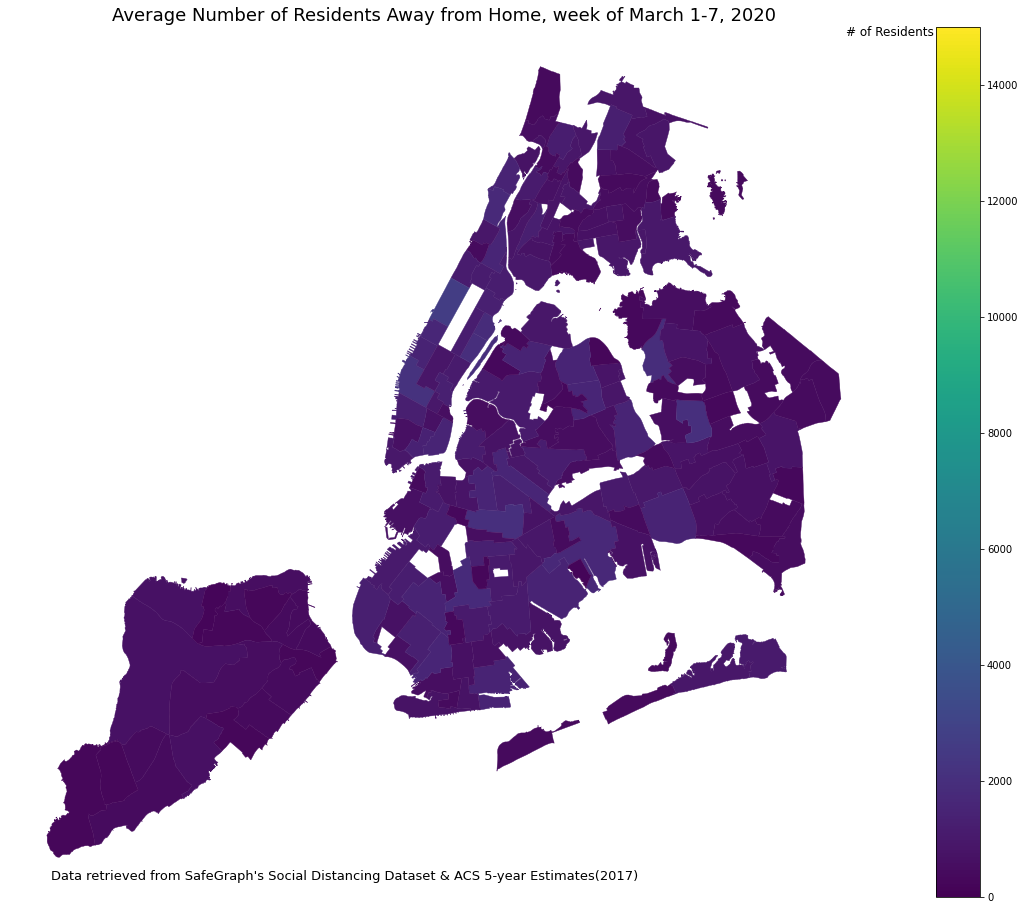

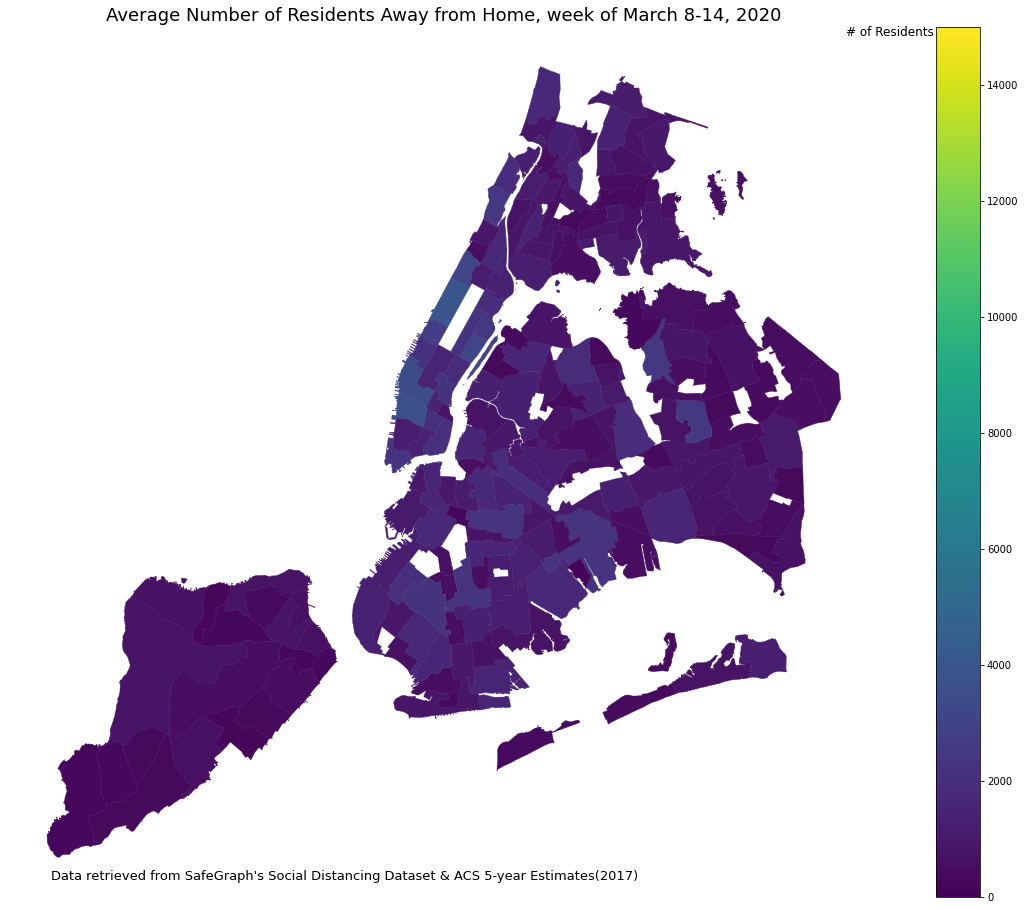

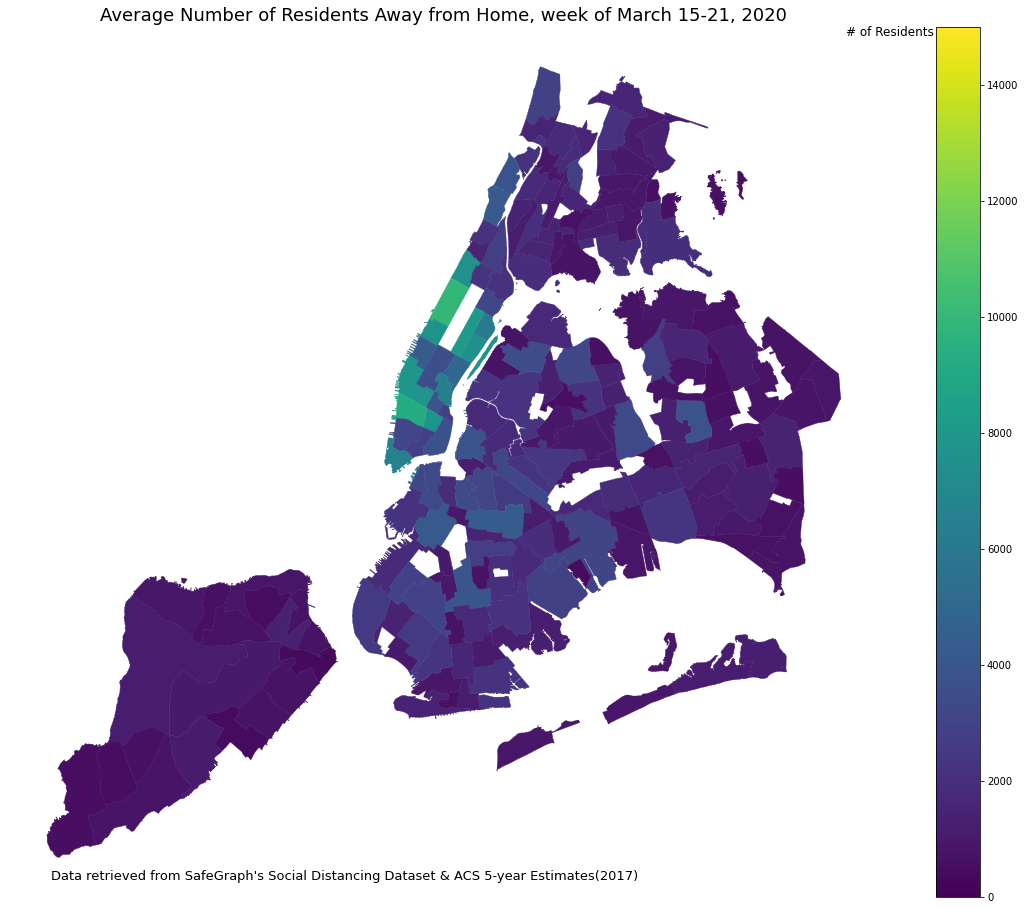

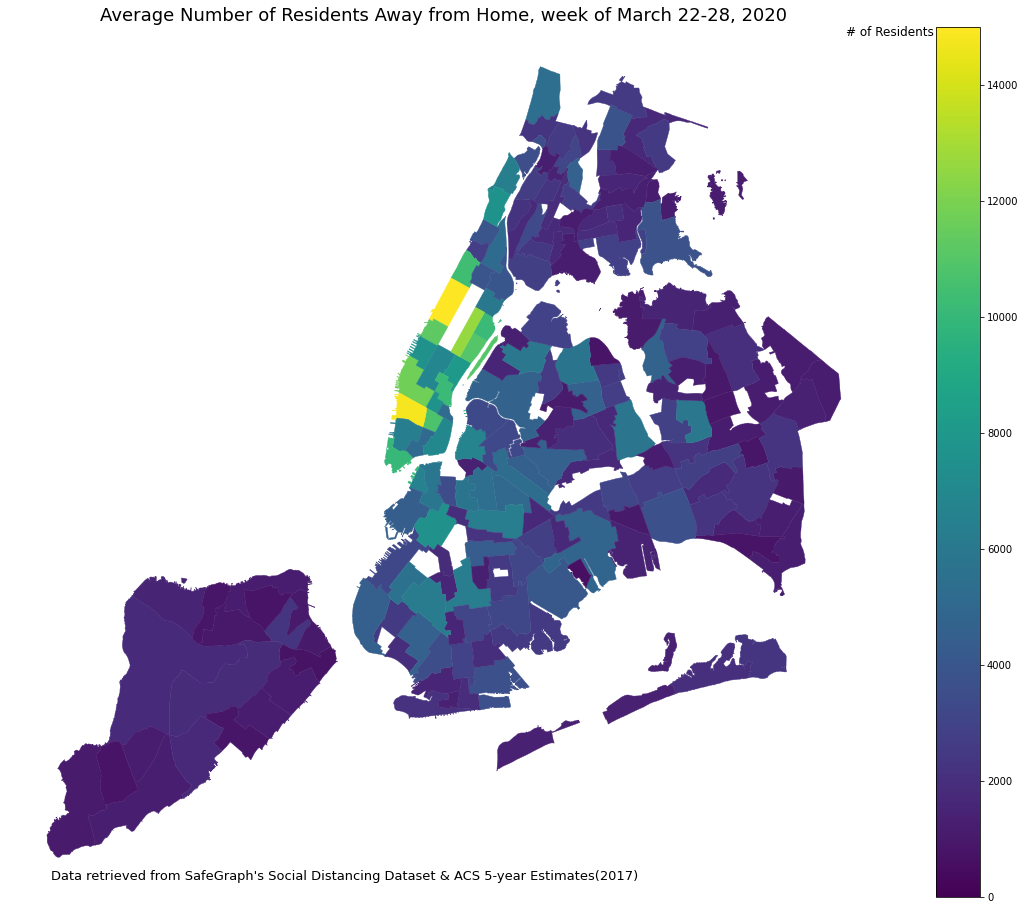

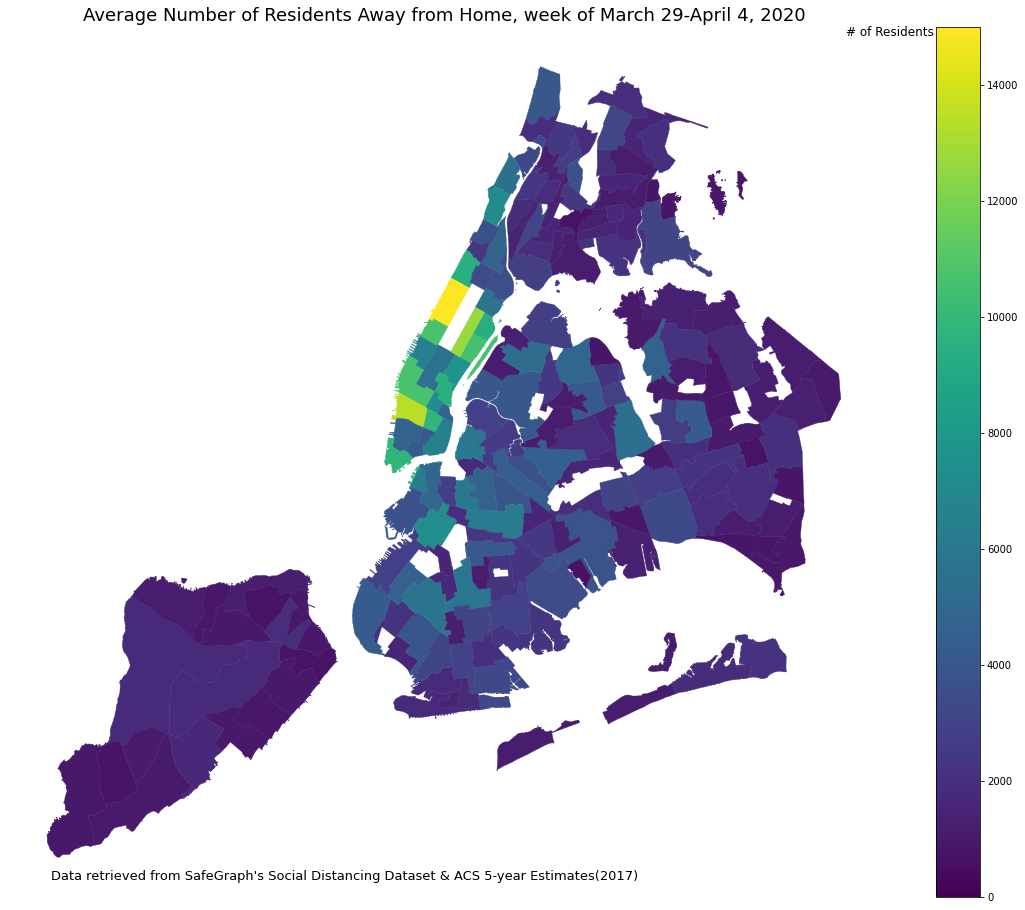

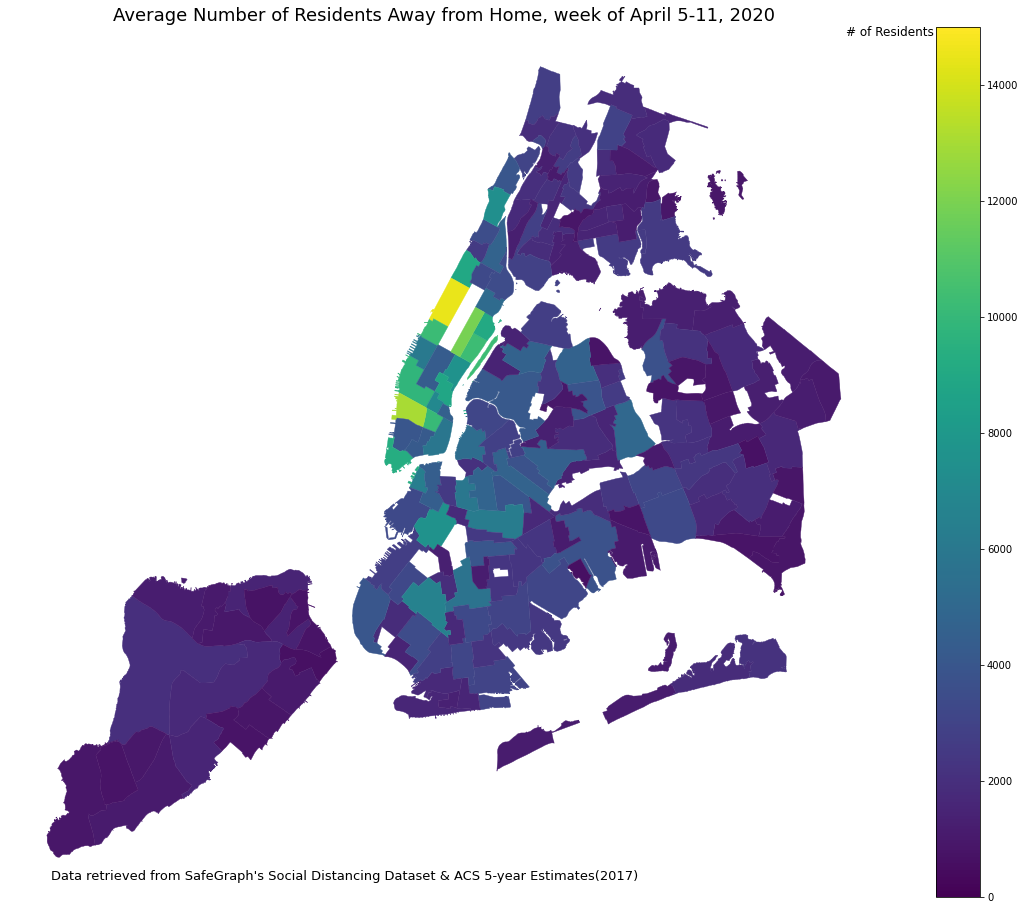

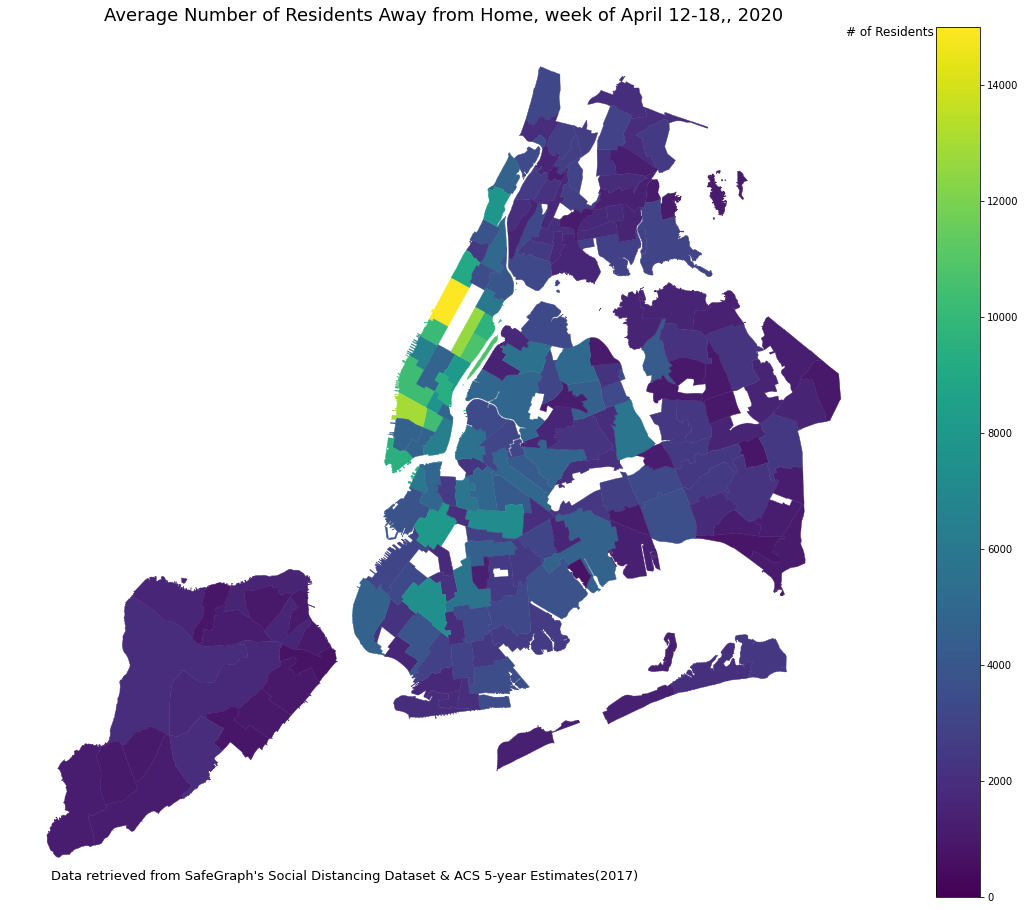

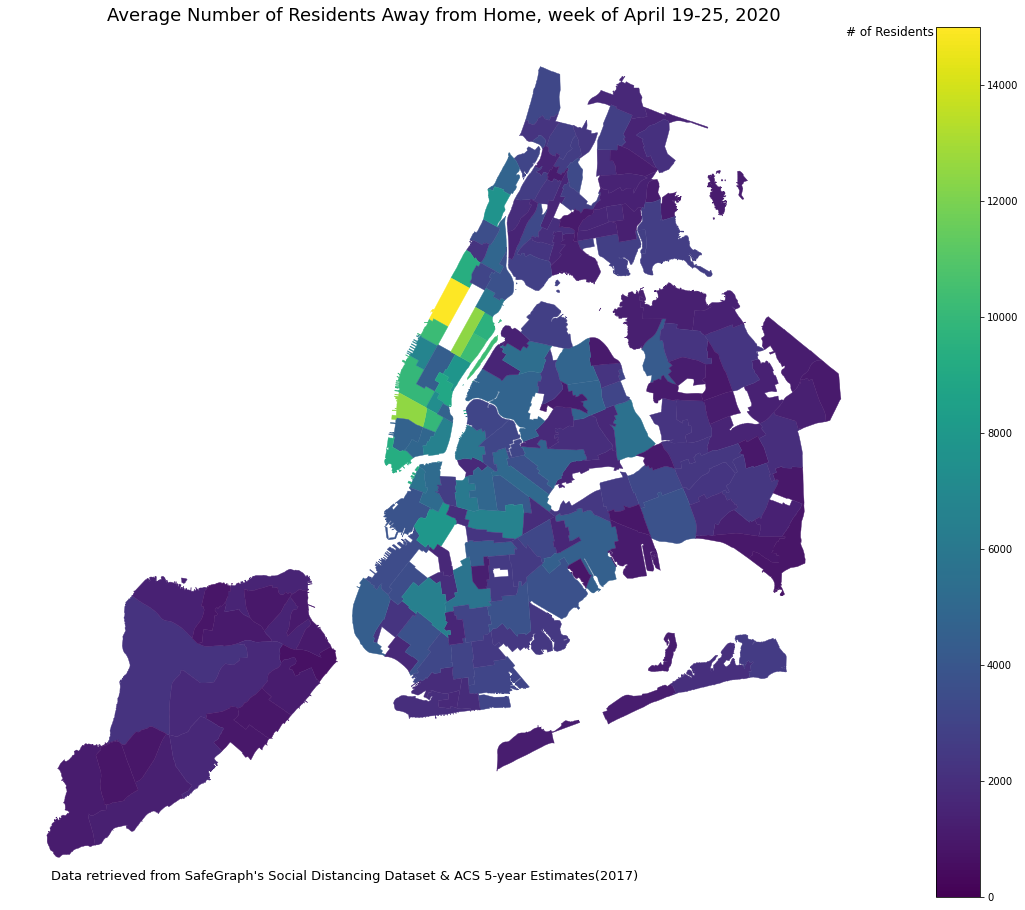

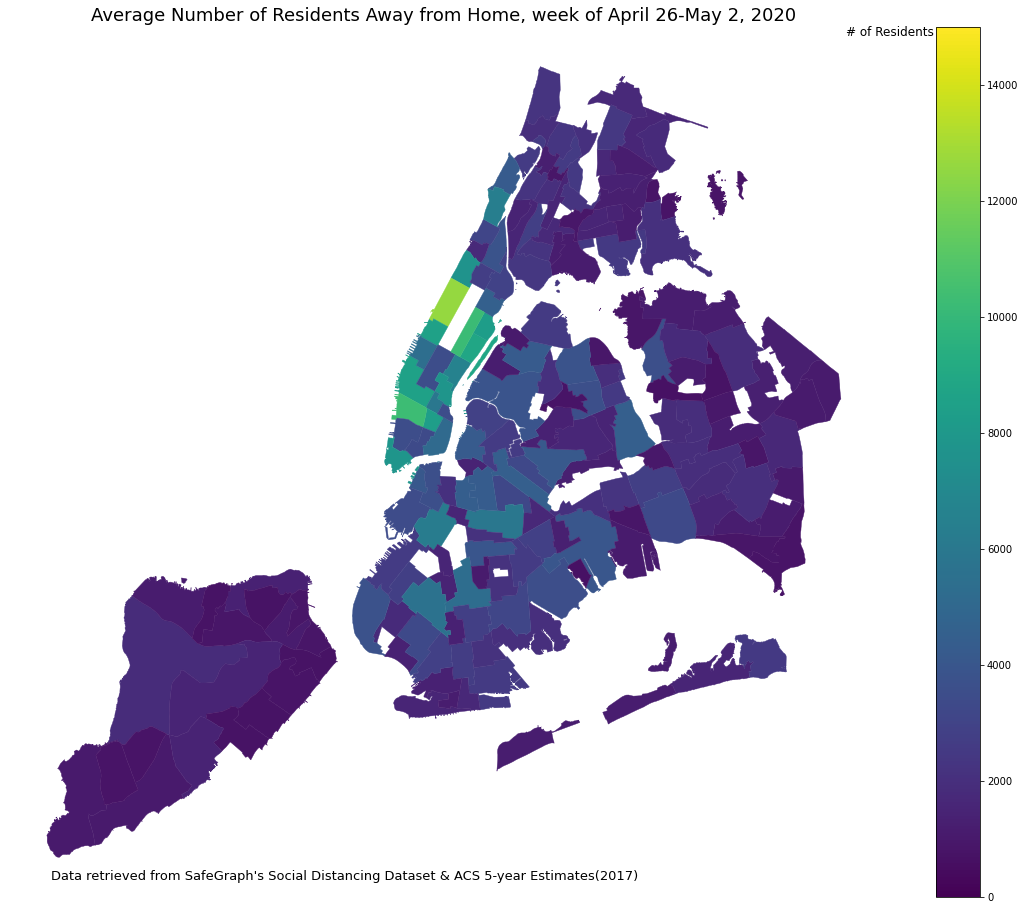

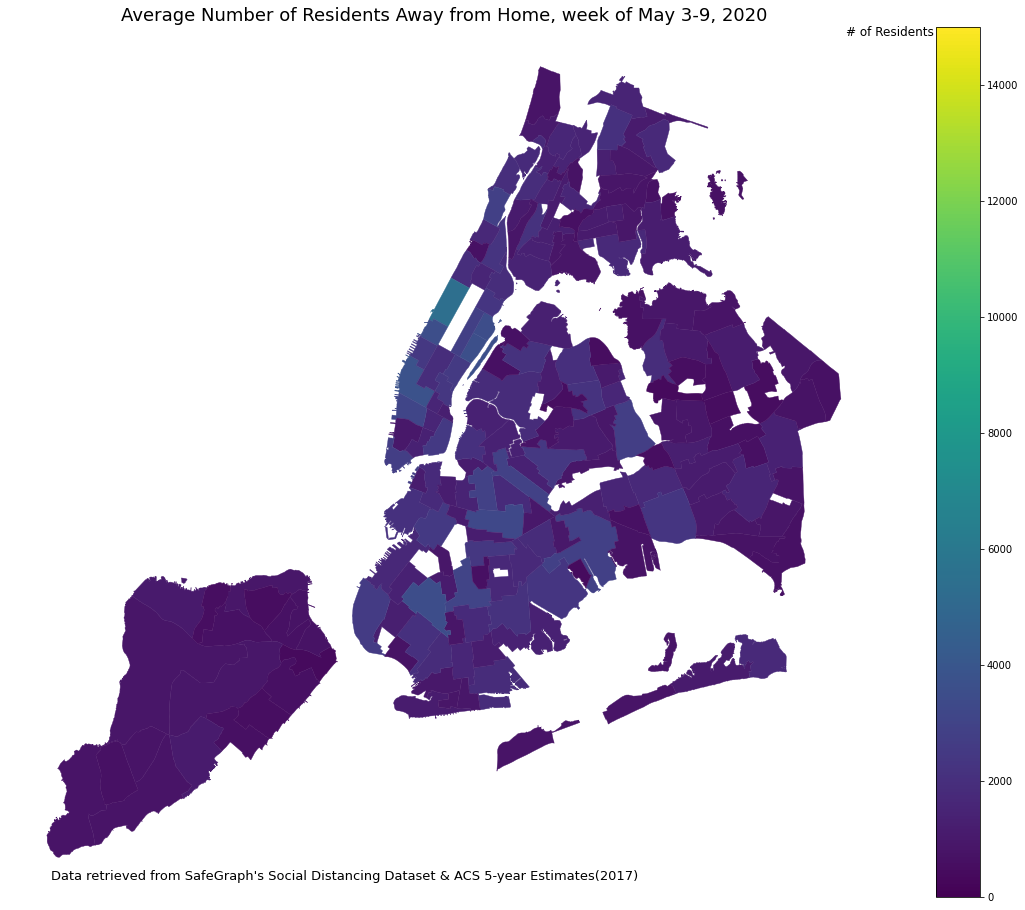

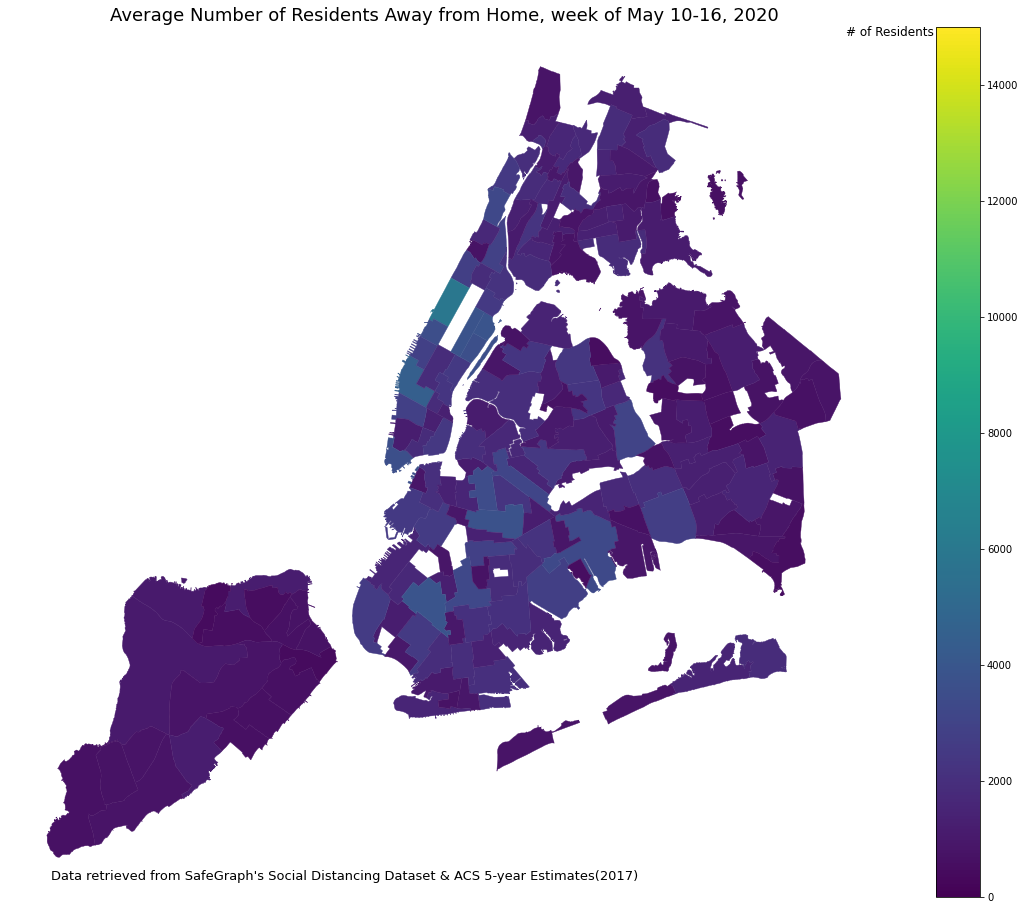

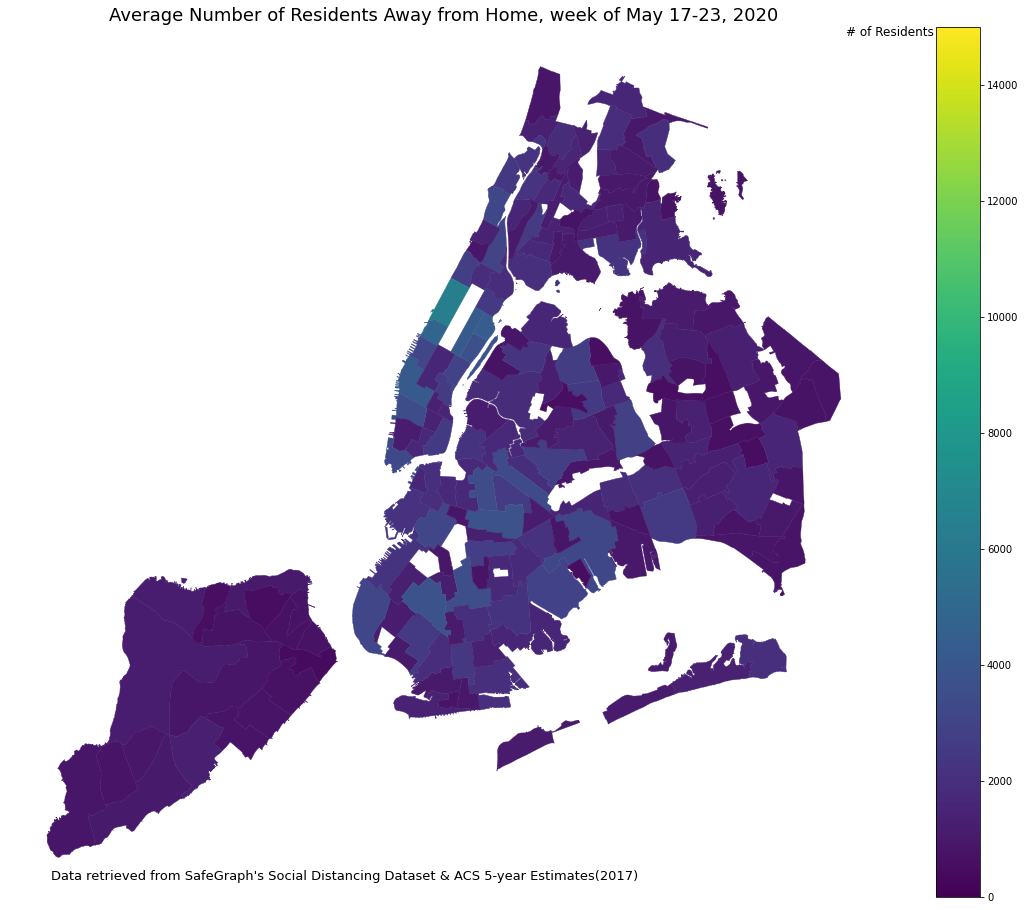

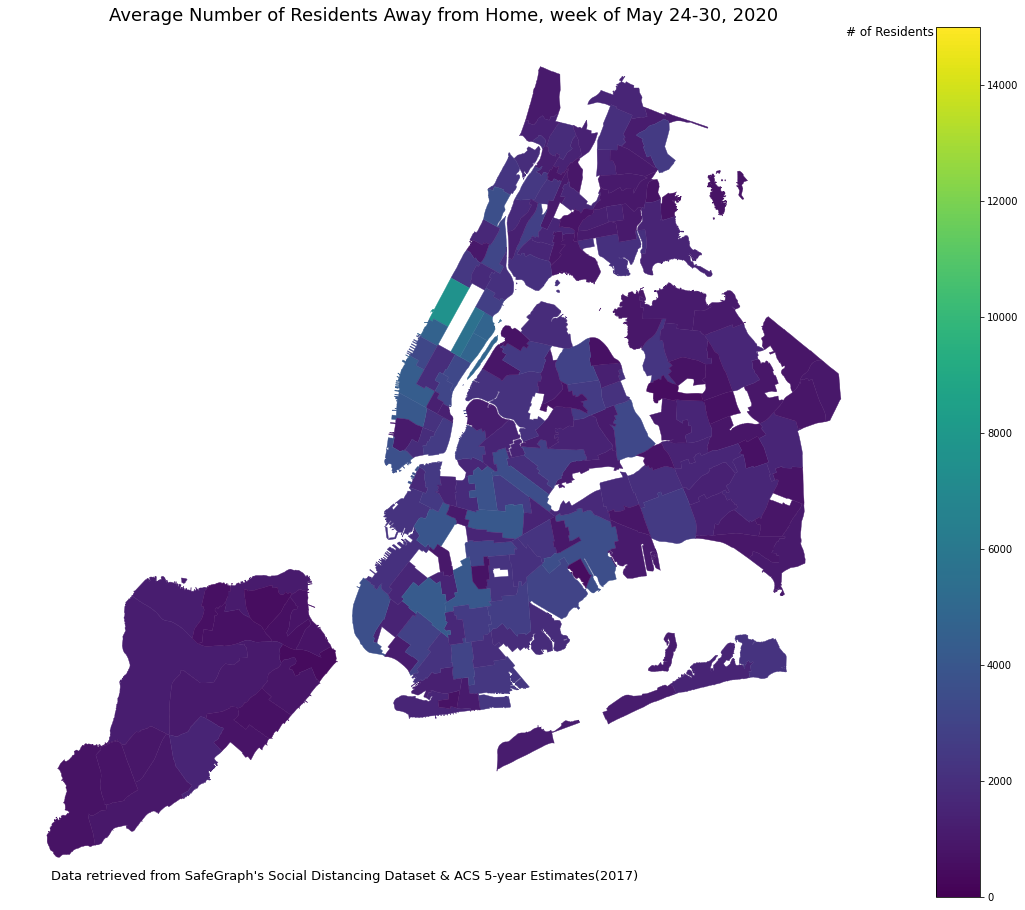

In [56]:
for w, wn in weeks_dict.items():
    gdf = week_gdf[week_gdf['week'].isin([w])]
    weekly_maps(gdf, wn)